In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
data = pd.read_csv("datasets_1846_3197_Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


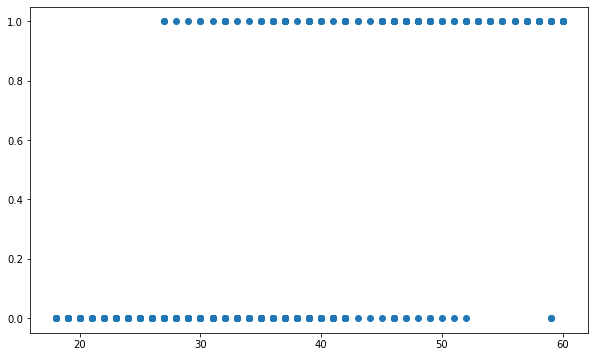

In [3]:
plt.scatter(data['Age'], data['Purchased'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.30)

In [8]:
data.shape

(400, 5)

In [7]:
X_train.shape

(280,)

# Sigmoid Funtion

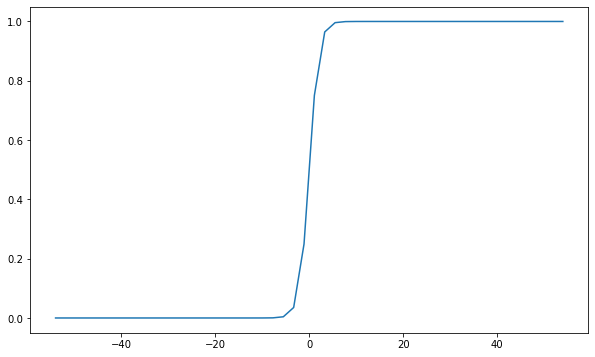

In [9]:
x = np.linspace(-54, 54, 50) 
z = 1/(1 + np.exp(-x))
plt.plot(x, z) 

In [10]:
X_train

121    37
389    48
189    28
107    27
229    42
       ..
164    33
19     48
208    40
167    35
293    37
Name: Age, Length: 280, dtype: int64

In [11]:
def normalize(X):
    return X - X.mean()

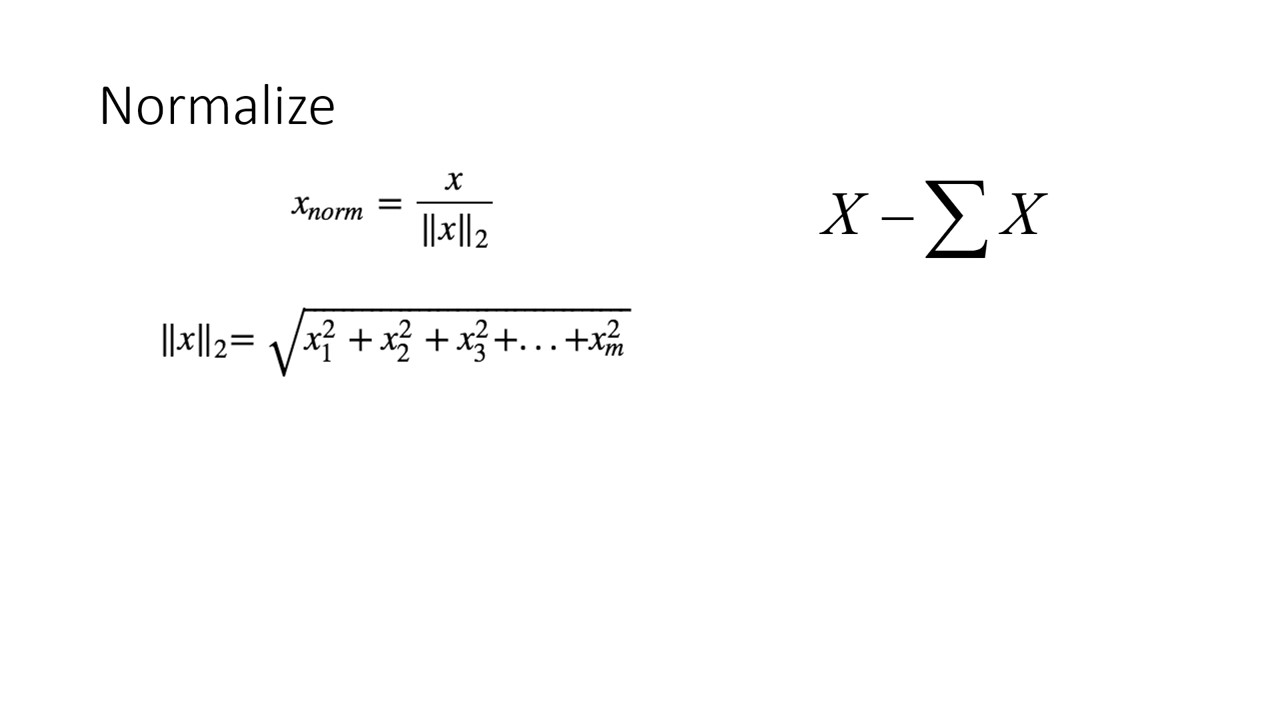

In [12]:
abs(X_train-X_train.mean()),X_train

(121     0.15
 389    11.15
 189     8.85
 107     9.85
 229     5.15
        ...  
 164     3.85
 19     11.15
 208     3.15
 167     1.85
 293     0.15
 Name: Age, Length: 280, dtype: float64,
 121    37
 389    48
 189    28
 107    27
 229    42
        ..
 164    33
 19     48
 208    40
 167    35
 293    37
 Name: Age, Length: 280, dtype: int64)

In [ ]:
#X_train

In [13]:
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-b0 -b1*x)) for x in X])

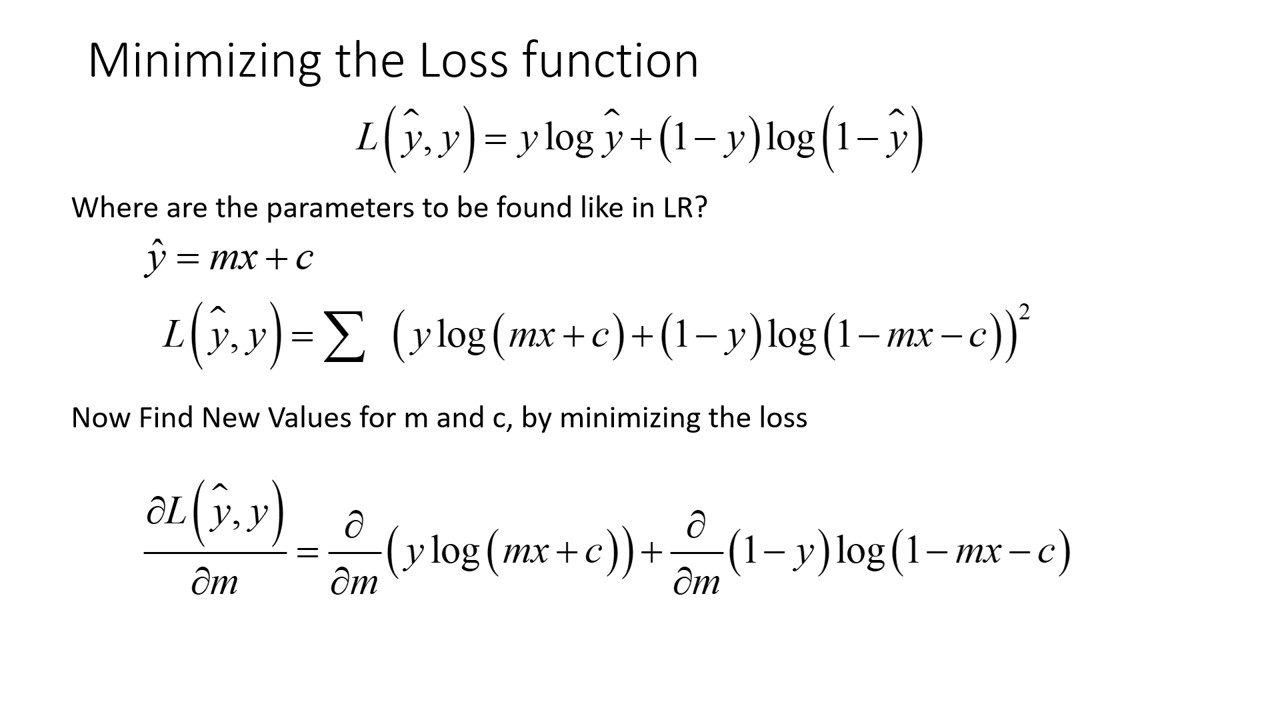

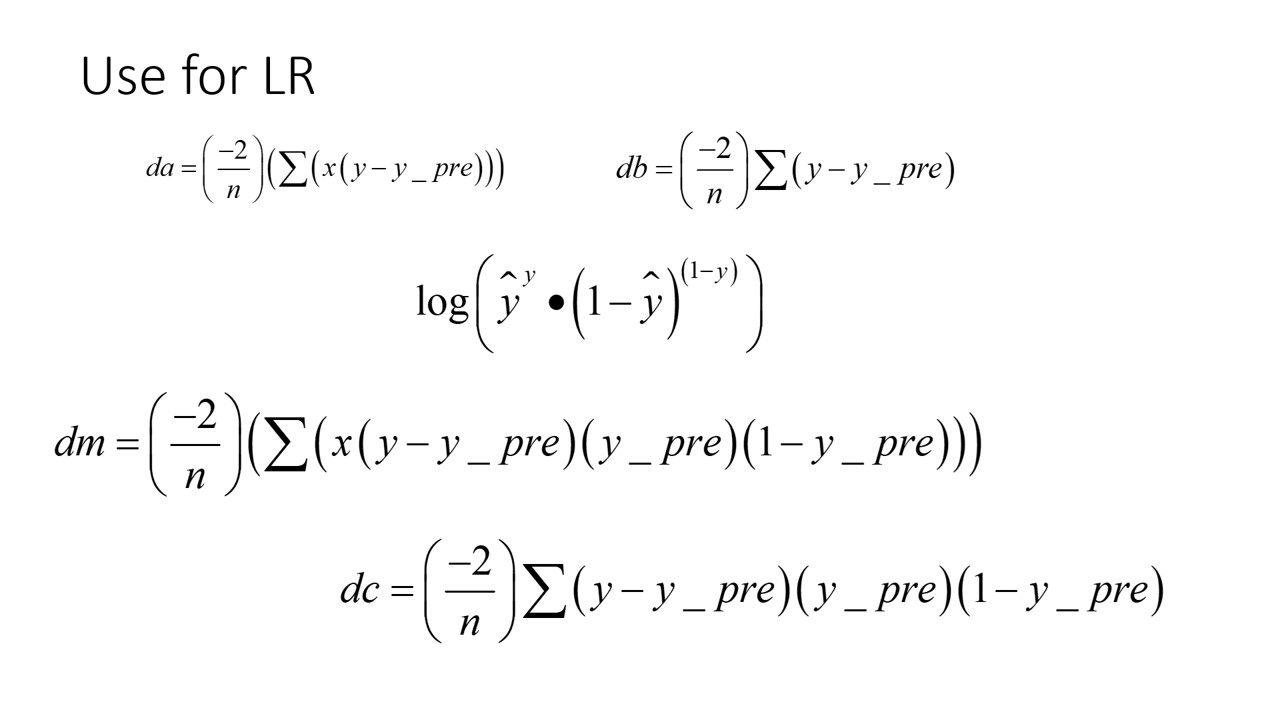

In [14]:
def logistic_regression(X, Y):
    X = normalize(X)
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 500
    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = (-2/len(X)) * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = (-2/len(X)) * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    return b0, b1

In [15]:
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
#y_pred1 = [1 if p >= 0.1 else 0 for p in y_pred]

In [ ]:
#y_pred

In [ ]:
np.count_nonzero(y_pred),np.count_nonzero(y_test)

In [16]:
for i in range(len(y_pred)):
   (y_pred[i] == y_test.iloc[i])

In [17]:
len(y_pred)

120

In [18]:
Y = y_test.iloc[:]

In [19]:
Y

205    0
113    0
327    0
298    0
131    0
      ..
0      0
235    1
245    1
186    0
49     0
Name: Purchased, Length: 120, dtype: int64

In [20]:
np.count_nonzero(Y)

50

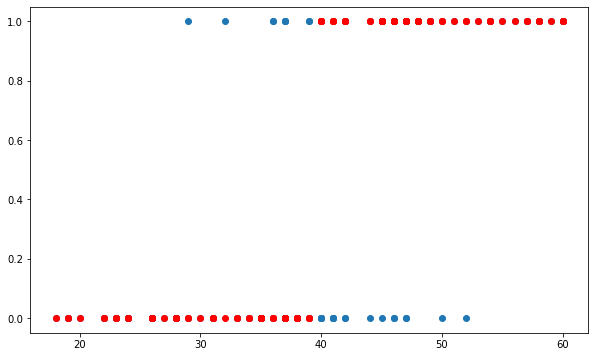

Accuracy = 0.775


In [21]:
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")